[*********************100%%**********************]  1 of 1 completed


<AxesSubplot:title={'center':'AAPL Stock Price'}, xlabel='Date'>

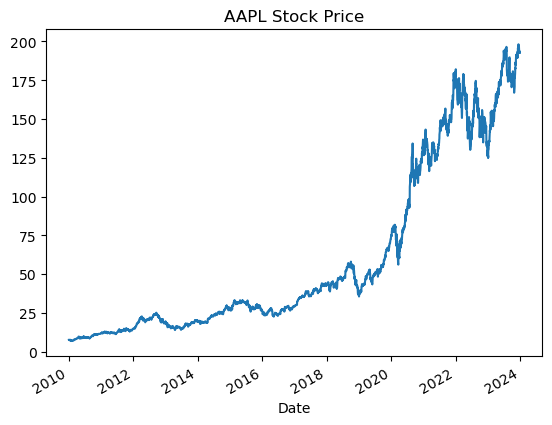

In [12]:
import yfinance as yf

# Download historical data for Apple stock
data = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
data['Close'].plot(title="AAPL Stock Price")


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Create a function to create the dataset with lookback
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X, y = create_dataset(data_scaled, look_back=60)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
109/109 [==============================] - 6s 26ms/step - loss: 0.0088
Epoch 2/50
109/109 [==============================] - 3s 26ms/step - loss: 3.5731e-04
Epoch 3/50
109/109 [==============================] - 3s 25ms/step - loss: 3.4684e-04
Epoch 4/50
109/109 [==============================] - 4s 32ms/step - loss: 3.3520e-04
Epoch 5/50
109/109 [==============================] - 3s 29ms/step - loss: 3.1891e-04
Epoch 6/50
109/109 [==============================] - 3s 25ms/step - loss: 2.8463e-04
Epoch 7/50
109/109 [==============================] - 3s 30ms/step - loss: 2.4837e-04
Epoch 8/50
109/109 [==============================] - 3s 29ms/step - loss: 2.7632e-04
Epoch 9/50
109/109 [==============================] - 3s 27ms/step - loss: 2.3399e-04
Epoch 10/50
109/109 [==============================] - 3s 30ms/step - loss: 2.3241e-04
Epoch 11/50
109/109 [==============================] - 3s 29ms/step - loss: 2.1865e-04
Epoch 12/50
109/109 [==============================] - 3

109/109 [==============================] - 3s 15ms/step


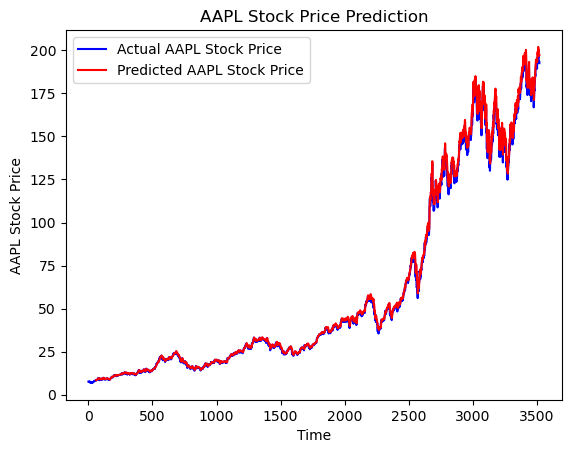

In [16]:
# Making predictions
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(data['Close'].values, color='blue', label='Actual AAPL Stock Price')
plt.plot(range(60,len(predicted_stock_price)+60), predicted_stock_price, color='red', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()
